## 1. t-Test: Compare means of continuous data between two groups

In [1]:
import numpy as np
from scipy import stats

**Variant A:**

In [2]:
# Randomly generating test scores for Group A and Group B
np.random.seed(0)  # for reproducibility
group_A_scores = np.random.normal(75, 10, 30) 
group_B_scores = np.random.normal(80, 10, 30)  

In [3]:
group_A_scores, group_B_scores

(array([92.64052346, 79.00157208, 84.78737984, 97.40893199, 93.6755799 ,
        65.2272212 , 84.50088418, 73.48642792, 73.96781148, 79.10598502,
        76.44043571, 89.54273507, 82.61037725, 76.21675016, 79.43863233,
        78.33674327, 89.94079073, 72.94841736, 78.13067702, 66.45904261,
        49.47010184, 81.53618595, 83.64436199, 67.5783498 , 97.69754624,
        60.45634325, 75.45758517, 73.1281615 , 90.32779214, 89.6935877 ]),
 array([81.54947426, 83.7816252 , 71.12214252, 60.19203532, 76.52087851,
        81.56348969, 92.30290681, 92.02379849, 76.12673183, 76.97697249,
        69.51447035, 65.79982063, 62.93729809, 99.50775395, 74.90347818,
        75.61925698, 67.4720464 , 87.77490356, 63.86102152, 77.8725972 ,
        71.04533439, 83.86902498, 74.89194862, 68.19367816, 79.71817772,
        84.28331871, 80.66517222, 83.02471898, 73.65677906, 76.37258834]))

In [4]:
# Perform t-test
t_stat, p_val = stats.ttest_ind(group_A_scores, group_B_scores)

In [5]:
print(f'Test statistic (t): {t_stat}')
print(f'p-value: {p_val}')

Test statistic (t): 0.8897019207505203
p-value: 0.37730145339434484


=> We don't reject H0 ("we choose H0"), i.e. there is no significant difference between these groups

**Graphical depiction:**

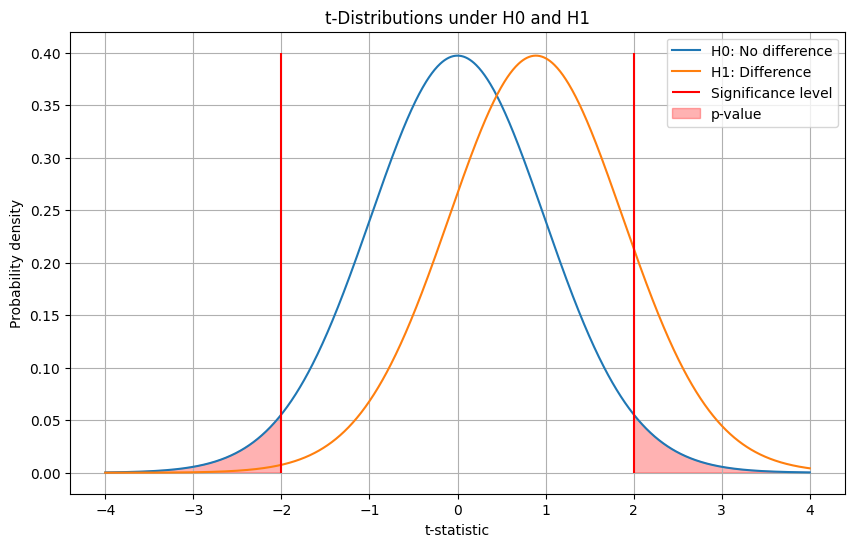

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
df = 58 #30  # degrees of freedom

# Variant A ( => H0 is not rejected, simply said: "H0 is selected"):
t_stat = 0.8897019207505203  # t-statistic from our t-test

# Variant B ( => H0 is rejected, simply said: "H1 is selected"):
#t_stat = -2.938977037944519  # t-statistic from our t-test

alpha = 0.05  # significance level

# Generate values for x axis
x = np.linspace(-4, 4, 1000)

# Calculate t-distributions
t_H0 = t.pdf(x, df, 0, 1)  # under H0: mean=0, std_dev=1
t_H1 = t.pdf(x, df, t_stat, 1)  # under H1: mean=t_stat, std_dev=1

# Calculate critical value (two-tailed test)
t_crit = t.ppf(1 - alpha/2, df)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.plot(x, t_H0, label='H0: No difference')
plt.plot(x, t_H1, label='H1: Difference')
plt.vlines([t_crit, -t_crit], 0, 0.4, colors='r', label='Significance level')
plt.fill_between(x, t_H0, where=(x >= t_crit) | (x <= -t_crit), color='red', alpha=0.3, label='p-value')
plt.legend()
plt.xlabel('t-statistic')
plt.ylabel('Probability density')
plt.title('t-Distributions under H0 and H1')
plt.grid(True)
plt.show()


In [11]:
t_crit

2.0017174830120923

**Variant B:**

In [7]:
np.random.seed(0)  # for reproducibility
group_A_scores = np.random.normal(75, 10, 30)  # mean=75, std_dev=10, n=30
group_B_scores = np.random.normal(90, 10, 30)  # mean=80, std_dev=10, n=30

# Perform t-test
t_stat, p_val = stats.ttest_ind(group_A_scores, group_B_scores)

print(f'Test statistic (t): {np.abs(t_stat)}')
print(f'p-value: {p_val}')

Test statistic (t): 2.938977037944519
p-value: 0.004720335438244378


=> We reject H0 ("we choose H1"), i.e. there is significant difference between these groups

**Graphical depiction:**

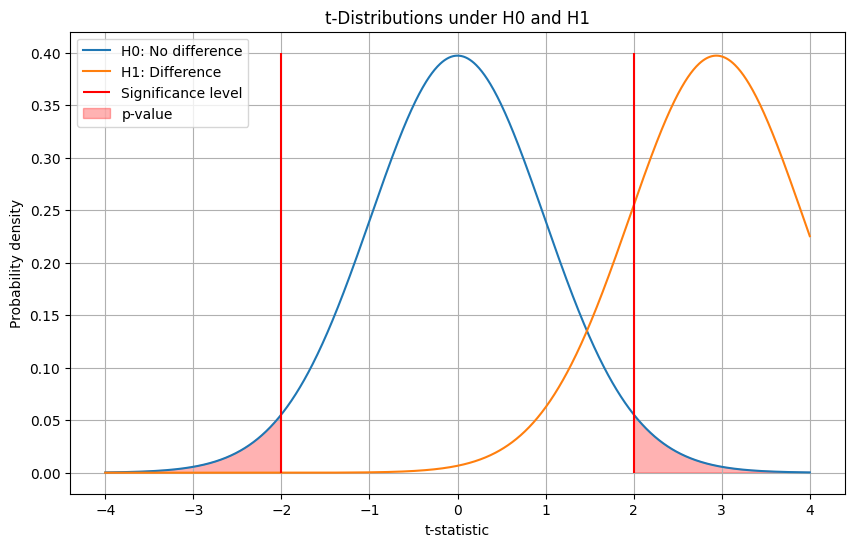

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
df = 58 #30  # degrees of freedom

# Variant A ( => H0 is not rejected, simply said: "H0 is selected"):
t_stat = 2.938977037944519  # t-statistic from our t-test

# Variant B ( => H0 is rejected, simply said: "H1 is selected"):
#t_stat = -2.938977037944519  # t-statistic from our t-test

alpha = 0.05  # significance level

# Generate values for x axis
x = np.linspace(-4, 4, 1000)

# Calculate t-distributions
t_H0 = t.pdf(x, df, 0, 1)  # under H0: mean=0, std_dev=1
t_H1 = t.pdf(x, df, t_stat, 1)  # under H1: mean=t_stat, std_dev=1

# Calculate critical value (two-tailed test)
t_crit = t.ppf(1 - alpha/2, df)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.plot(x, t_H0, label='H0: No difference')
plt.plot(x, t_H1, label='H1: Difference')
plt.vlines([t_crit, -t_crit], 0, 0.4, colors='r', label='Significance level')
plt.fill_between(x, t_H0, where=(x >= t_crit) | (x <= -t_crit), color='red', alpha=0.3, label='p-value')
plt.legend()
plt.xlabel('t-statistic')
plt.ylabel('Probability density')
plt.title('t-Distributions under H0 and H1')
plt.grid(True)
plt.show()
